# Linear Regression
There are 2 types of linear regression
Simple Linear Regression and
Multi Linear Regression

This project is the first in a series of Machine Learning micro projects. These small projects demonstrate how we can use scikit-learn to create ML models in Python, dealing with a variety of datasets.

# Exploring the Data
Let's start with importing the necessary libaries, reading in the data, and checking out the dataset.

In [1]:
# Import libraries necessary for this project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [7]:
#Load the data from datasets folder
A=pd.read_csv("50.csv")
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Calculating Statistics
We will make a cursory investigation about the whole data and calculating descriptive statistics.

In [10]:
A.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Correlation
We'll find correlatin in our data

In [11]:
A.corr()

,RND,ADMIN,MKT,PROFIT
RND,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKT,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


# Exploratory Analysis
Before we begin fitting a linear regression model on the data, let's try and eyeball it first.

Visualising the relationship between Profit and RND.

Text(0.5, 1.0, 'PROFIT vs RND analysis')

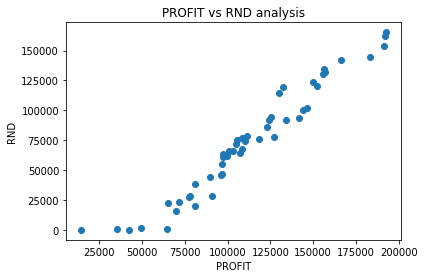

In [12]:
plt.scatter(A.PROFIT,A.RND)
plt.xlabel("PROFIT")
plt.ylabel("RND")
plt.title("PROFIT vs RND analysis")

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='STATE', ylabel='PROFIT'>

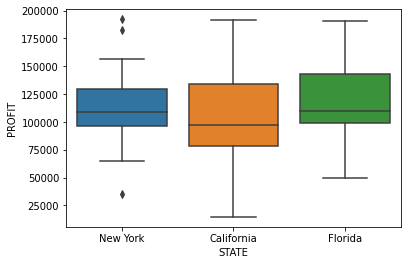

In [13]:
sb.boxplot(A.STATE,A.PROFIT)

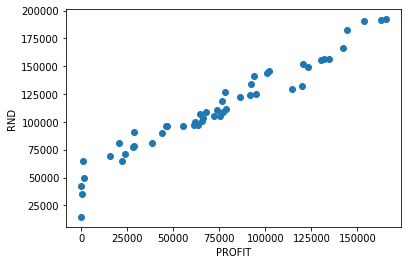

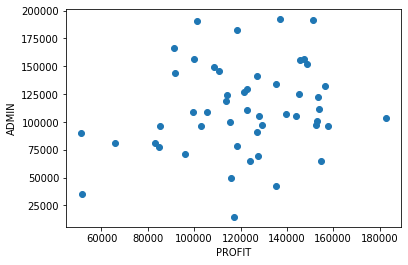

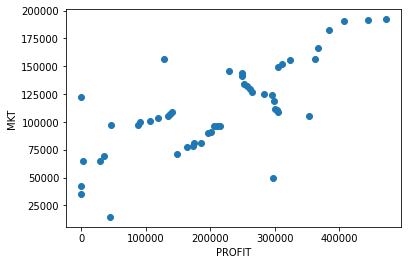

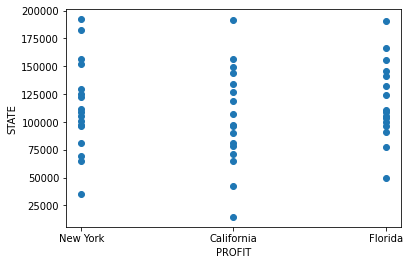

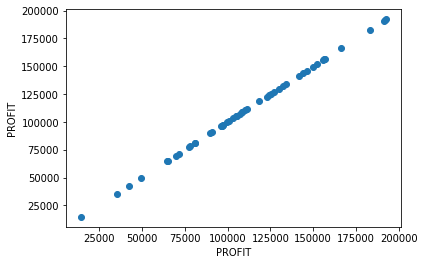

In [14]:
#We can build scatterplots to see if our intuition is correct.
for i in A.columns:
    plt.scatter(A[i],A.PROFIT)
    plt.xlabel("PROFIT")
    plt.ylabel("%s"%i)
    plt.show()

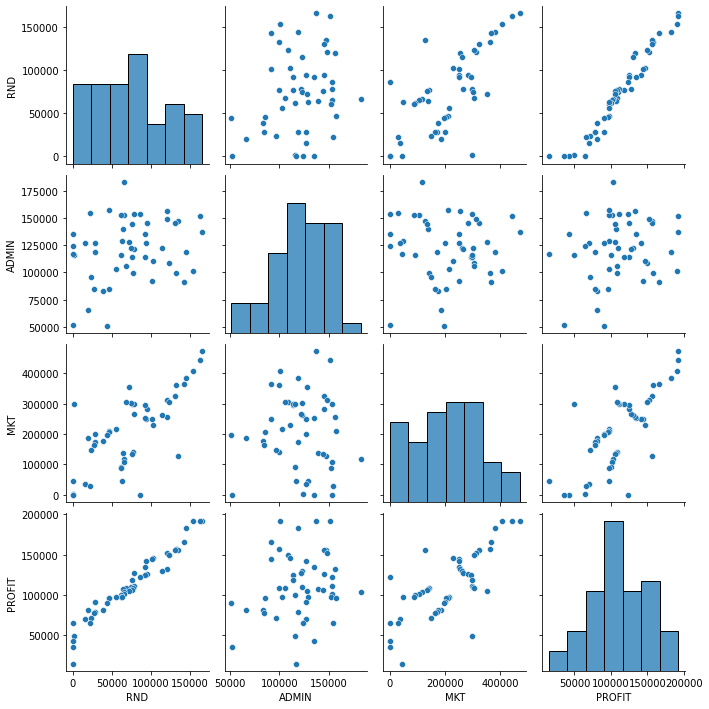

In [15]:
#Creating a pair plot for detailed view
sb.pairplot(A)
plt.show()

# Distribution Plot

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


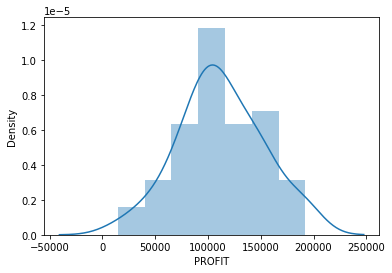

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


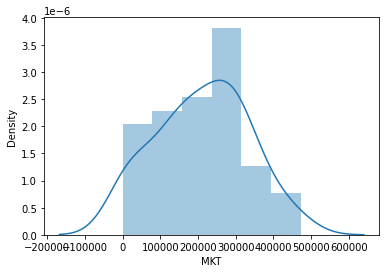

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


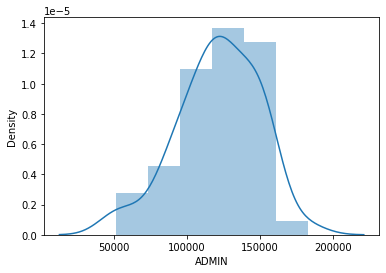

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


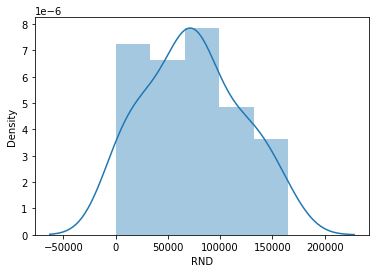

In [16]:
B=A[["PROFIT","MKT","ADMIN","RND"]]
for i in B.columns:
    sb.distplot(B[i])
    plt.show()

# Developing SLR Model
In this we are going to create model for our project

# Shuffle and Split Data
We'll now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


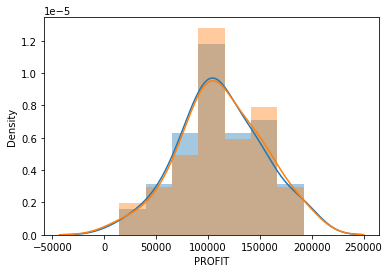

In [17]:
# Import train_test_split
#from sklearn.model_selection import train_test_split
X=A[["RND"]]
Y=A[["PROFIT"]]
# Split the 'features' and 'income' data into training and testing sets
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
sb.distplot(A.PROFIT)#or Y.PROFIT
sb.distplot(ytrain.PROFIT) #run until we get the best line of the graph
plt.show()

# Making Model

In [19]:
#Model
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)

# Making Multiple Models

In [21]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.1)
best=0
for _ in range(100000):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2)
    #training starts from here
    linear=linear_model.LinearRegression()#model created 
    linear.fit(xtrain,ytrain)#fitting data to find the best fit line
    acc=linear.score(xtest,ytest)#accuracy of the model
    if acc > best:
        best=acc
        import pickle
        with open("studentmodel.pickel","wb") as f:#Saving Our Model
            pickle.dump(linear,f)
best

0.9963091762546756

In [25]:
#Loading Our Best Model
pickle_in=open("studentmodel.pickel","rb")
linear=pickle.load(pickle_in)
pred=linear.predict(xtest)

In [23]:
#comparing
ytest['PREDECTED_PROFIT']=pred
ytest['Actual_values_RND']=xtest
ytest

C:\Users\user\AppData\Local\Temp/ipykernel_11188/1205813209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest['PREDECTED_PROFIT']=pred
C:\Users\user\AppData\Local\Temp/ipykernel_11188/1205813209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest['Actual_values_RND']=xtest


,PROFIT,PREDECTED_PROFIT,Actual_values_RND
24,108552.04,114892.685959,77044.01
17,125370.37,129877.620039,94657.16
47,42559.73,49345.102982,0.00
20,118474.03,114220.441320,76253.86
2,191050.39,179890.230485,153441.51
11,144259.40,134994.897840,100671.96
5,156991.12,161543.469156,131876.90
18,124266.90,127403.548774,91749.16
27,105008.31,110692.881924,72107.60
13,134307.35,127610.484246,91992.39


# ERROR FINDING

In [26]:
MAE=mean_absolute_error(ytest['PROFIT'],pred)
print("Errors are %.2f"%MAE)

Errors are 6238.20


# Analyzing Model Performance¶

In [27]:
b0=model.intercept_
b1=model.coef_

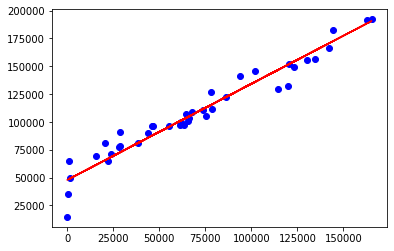

In [28]:
plt.scatter(xtrain.RND,ytrain.PROFIT,c='blue')
plt.plot(xtrain,b0+b1*xtrain,c="red")
plt.xlabel='PROFIT'
plt.ylabel='RND'

# Multi Linear Regression(MLR)

# Categorical into contionous
Converting categorical data into continous data using One Hot Encoding

In [ ]:
A=A.join(pd.get_dummies(A.STATE))

# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
A['NewState']=le.fit_transform(A.STATE)

# Developing MLR Model

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

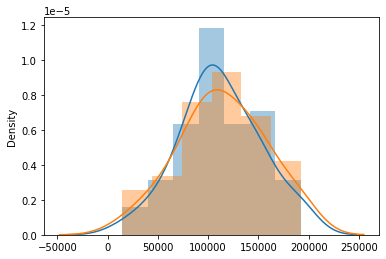

In [11]:
X = A[["RND","MKT","California","Florida","New York"]]
Y = A[["PROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)
sb.distplot(Y)
sb.distplot(ytrain)

In [13]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model=lm.fit(xtrain,ytrain)
pred=model.predict(xtest)
ytest["PREDICTED"]=pred
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(ytest.PROFIT,pred)
print("%.2f"%MAE)

5678.32


C:\Users\user\AppData\Local\Temp/ipykernel_24012/4227126632.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ytest["PREDICTED"]=pred


In [ ]:
#plt.figure(figsize=(10,6))
#plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
#         markerfacecolor='red', markersize=10)
#plt.title('Error Rate vs. K Value')
#plt.xlabel('K')
#plt.ylabel('Error Rate')